In [3]:
cd E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Figs

E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Figs


In [1]:
import os
from glob import glob
from nilearn.datasets import fetch_neurovault_ids
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from nilearn.image import smooth_img
from nilearn.image import math_img
from neuromaps.transforms import mni152_to_fslr
from neuromaps.transforms import mni152_to_fsaverage
from neuromaps.datasets import fetch_fslr
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
from surfplot.utils import threshold

In [4]:
def file_extraction(par_dir, file_suffix, dir_order):
    
    """
    par_dir:     the parent folder of functional images;
    file_suffix: the image suffix e.g. 'nii.gz'/'nii';
    dir_order:   the index of subfolder under parent folder, in which functional images 
                 were saved. Index 1 refer to the 1st layer of parent folder(i.e. exactly 
                 within parent folder) and index 2 refers to 2nd layer(i.e. the subfolders
                 under parent folder). The function only supports exploring two layers.
    """
    dirs_ls = os.listdir(par_dir)
    dirs_ls.sort()
    filenames = []
    for dir in dirs_ls:
        if dir_order == 2:
            files_folder = par_dir+'/'+dir
            print(files_folder)
            filename = glob(os.path.join(files_folder, '*'+file_suffix))
            if len(filename) != 0:
                if os.path.exists(filename[0]):
                    filenames.append(filename[0])
        else:
            if dir.endswith(file_suffix):
                files_folder = par_dir+'/'+dir
                filename = glob(files_folder)
                if len(filename) != 0:
                    if os.path.exists(filename[0]):
                        filenames.append(filename[0])
    return filenames

In [5]:
def layer2surf(
    p,
    path_img, 
    thresh, 
    cmap_face='red_transparent', 
    as_outline=True, 
    cmap_outline='black_blue', 
    alpha=0.65, 
    cbar=True):
    
    """p: brain surface plotted with surface data"""
    
    # read stat_img and project volumetric data to surface
    gii_lh, gii_rh = mni152_to_fslr(path_img, fslr_density='164k')

    # threshold after projection to avoid interpolation artefacts
    data_lh = threshold(gii_lh.agg_data(), thresh, binarize=True)
    data_rh = threshold(gii_rh.agg_data(), thresh, binarize=True)

    # add statistical data(transformed surface data) to surface template(surf_fsLR):
    p.add_layer(
        {'left': data_lh, 'right': data_rh}, 
        cmap=cmap_face,
        # color_range=(0, 3.09),
        alpha = alpha,
        cbar = cbar,
        # as_outline=True,
        # cbar_label = 'Anxiety ∩ Empathy'
        )
    if as_outline:
        p.add_layer({'left': data_lh, 'right': data_rh}, cmap=cmap_outline, as_outline=True, cbar=False)

E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_10/robust0001
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_10/robust0002
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_10/robust0003
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_11_12/robust0001
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_11_12/robust0002
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_11_12/robust0003
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_6_7/robust0001
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Children_ageG\Age_6_7/robust0002
E:\Im

C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\13364923.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\13364923.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\13364923.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\13364923.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\13364923.py:44: UserWarning: Matplotlib is currently using module://ma

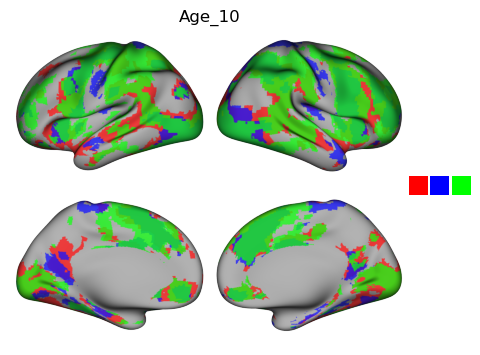

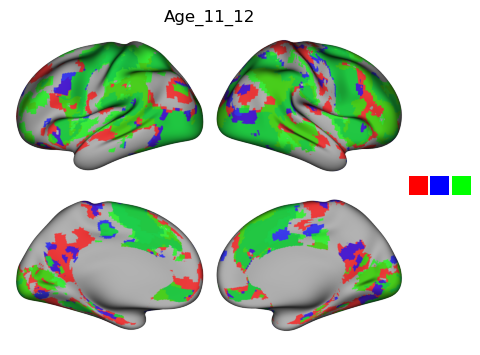

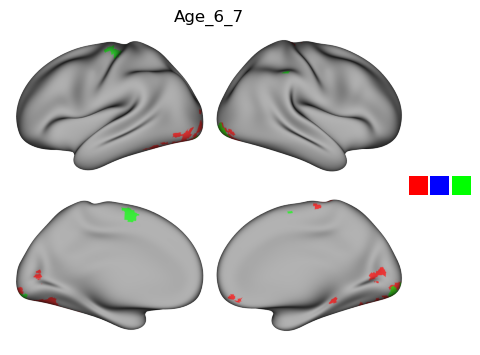

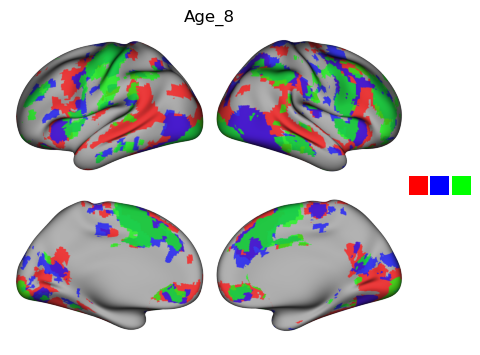

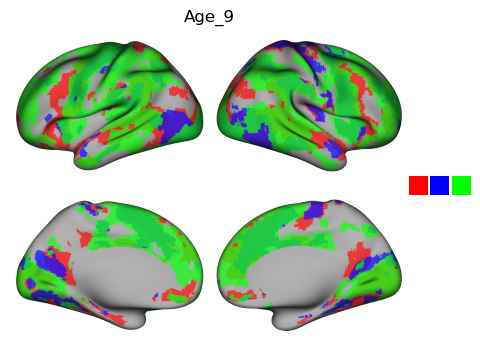

In [7]:
'''
Plotting activations of three conditions into one surf group-wise:
Here: Children groups
'''

dir_stats = 'E:\\ImportantDOCs\\currentWKdir\\work_postdoc\\BART_supplement\\stats_2nd-level\\Rob_reg_results\\Children_ageG'
folder_ageG = os.listdir(dir_stats)
ls_statimgs = []
for folder in folder_ageG:
    folder_stat = f'{dir_stats}\\{folder}'
    ls_statimg_ageG = file_extraction(par_dir=folder_stat, file_suffix='fdr05.nii', dir_order=2)
    ls_statimgs.append(ls_statimg_ageG)

for ageG in folder_ageG:
    
    title = ageG
    thresh = 0
    index = folder_ageG.index(title)
    # get surface and sulc maps and then plot them:
    surf_fsLR = fetch_fslr(density='164k')
    lh, rh = surf_fsLR['inflated']
    p = Plot(lh, rh)

    cmaps_ls = ['red_transparent', 'blue_transparent', 'green_transparent']
    ls_stat_imgs = [ls_statimgs[index][-1], ls_statimgs[index][0], ls_statimgs[index][1]]

    for img, cmap in zip(ls_stat_imgs, cmaps_ls):
        layer2surf(
        p=p,
        path_img=img, 
        thresh=thresh, 
        cmap_face=cmap, 
        as_outline=False, 
        cmap_outline='black_blue', 
        alpha=0.75, 
        cbar=True    
        )
        
    # color bar setting:
    kws = dict(location='right', draw_border=False, aspect=1, shrink=0.05, decimals=0, pad=0, label_direction=90, fontsize=8, n_ticks=0)

    # plotting:
    fig = p.build(cbar_kws=kws)
    fig.axes[0].set_title(title, pad=-3)
    fig.show()
    fig.savefig(f'act_cons_{title}.png', dpi=300, transparent=True)

E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Adults/robust0001
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Adults/robust0002
E:\ImportantDOCs\currentWKdir\work_postdoc\BART_supplement\stats_2nd-level\Rob_reg_results\Adults/robust0003


C:\Users\drdsr\AppData\Local\Temp\ipykernel_15976\2545000382.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


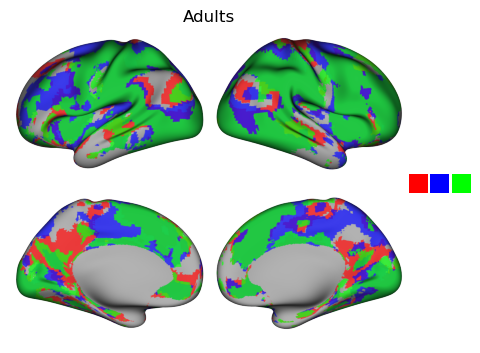

In [10]:
'''
Plotting activations of three conditions into one surf group-wise:
Here: Adults group
'''

dir_stats = 'E:\\ImportantDOCs\\currentWKdir\\work_postdoc\\BART_supplement\\stats_2nd-level\\Rob_reg_results\\Adults'
ls_statimgs = file_extraction(par_dir=dir_stats, file_suffix='fdr05.nii', dir_order=2)

title = 'Adults'
thresh = 0

# get surface and sulc maps and then plot them:
surf_fsLR = fetch_fslr(density='164k')
lh, rh = surf_fsLR['inflated']
p = Plot(lh, rh)

cmaps_ls = ['red_transparent', 'blue_transparent', 'green_transparent']
ls_stat_imgs = [ls_statimgs[-1], ls_statimgs[0], ls_statimgs[1]]

for img, cmap in zip(ls_stat_imgs, cmaps_ls):
    layer2surf(
    p=p,
    path_img=img, 
    thresh=thresh, 
    cmap_face=cmap, 
    as_outline=False, 
    cmap_outline='black_blue', 
    alpha=0.75, 
    cbar=True    
    )
    
# color bar setting:
kws = dict(location='right', draw_border=False, aspect=1, shrink=0.05, decimals=0, pad=0, label_direction=90, fontsize=8, n_ticks=0)

# plotting:
fig = p.build(cbar_kws=kws)
fig.axes[0].set_title(title, pad=-3)
fig.show()
fig.savefig(f'act_cons_{title}.png', dpi=300, transparent=True)

In [9]:
ls_statimgs

['E:\\ImportantDOCs\\currentWKdir\\work_postdoc\\BART_supplement\\stats_2nd-level\\Rob_reg_results\\Adults/robust0001\\tmap-Adults_con-inflation_corr-fdr05.nii',
 'E:\\ImportantDOCs\\currentWKdir\\work_postdoc\\BART_supplement\\stats_2nd-level\\Rob_reg_results\\Adults/robust0002\\tmap-Adults_con-win_corr-fdr05.nii',
 'E:\\ImportantDOCs\\currentWKdir\\work_postdoc\\BART_supplement\\stats_2nd-level\\Rob_reg_results\\Adults/robust0003\\tmap-Adults_con-loss_corr-fdr05.nii']